In [185]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas.plotting

In [16]:
#Read the whole dataset ( which is in pikcle format for each tokenized translation file ) into a dictionary
movies_dic = {
   "rating" : [],
   "movie_words" : []
}

for file_name in os.listdir("./pickle_files"):
    rating = file_name.split("_")[0]
    pickle_object = open("./pickle_files/" + file_name, "rb")
    movie_dic = pickle.load(pickle_object)
    sentence_list = [movie_dic[key] for key in movie_dic.keys()]
    word_list = []
    
    for sentence in sentence_list:    
        word_list = word_list + sentence
        
    if rating == "G" or rating == "PG" or rating == "PG-13" or rating == "R" or rating == "NC-17":
        movies_dic["rating"].append(rating)
        movies_dic["movie_words"].append(word_list)
    else: 
        #Any film without rating, or rated with different rating system
        #or even a series(We foucs just on films right now) will be considered "OTHER"
        movies_dic["rating"].append("OTHER")       
        movies_dic["movie_words"].append(word_list)

In [45]:
#imorting the data into Pandas DataFrame
movies_table = pd.DataFrame(movies_dic)

print(movies_table.head())

  rating                                        movie_words
0      R  [time, get, back, vermont, wan, na, know, wort...
1      G  [sir, main, level, please, right, see, way, ba...
2     PG  [looks, like, paradise, fact, treacherous, des...
3  PG-13  [damn, fighters, going, gone, chasing, scalps,...
4  PG-13  [unbelievable, look, city, like, world, never,...


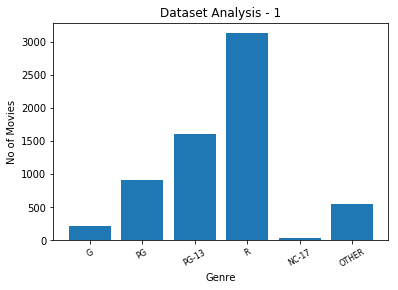

In [209]:
#calcuate the total film number
film_count = (len(movies_table.index) + 1)

#calcuate the total film number for each rating categorey
G_number = len(movies_table.loc[movies_table["rating"] == "G"])
PG_number = len(movies_table.loc[movies_table["rating"] == "PG"])
PG_13_number = len(movies_table.loc[movies_table["rating"] == "PG-13"])
R_number = len(movies_table.loc[movies_table["rating"] == "R"])
NC_17_number = len(movies_table.loc[movies_table["rating"] == "NC-17"])
OTHER_number = len(movies_table.loc[movies_table["rating"] == "OTHER"])

#Plot the movies number against their rating
plt.bar(np.arange(6),[G_number, PG_number, PG_13_number, R_number, NC_17_number, OTHER_number])
plt.xlabel('Genre', fontsize=10)
plt.ylabel('No of Movies', fontsize=10)
plt.xticks(np.arange(6), ["G", "PG", "PG-13","R","NC-17","OTHER"], fontsize=8, rotation=30)
plt.title('Dataset Analysis - 1')

plt.savefig("Dataset Analysis-1.png")

In [207]:
#Calcuate the frequency of words for each rating categorey

def calcuate_word_frequency(movies_table, rating):
    rated_movies_table = movies_table.loc[movies_table["rating"] == rating]["movie_words"]
    movies_word_list = []
    for index in rated_movies_table.index:
        movies_word_list = movies_word_list + rated_movies_table[index]

    movies_word_Series = pd.Series(movies_word_list)
    movies_words_frequency = movies_word_Series.value_counts()
    
    return movies_words_frequency


print(calcuate_word_frequency(movies_table, "G"))


oh                7498
get               6025
know              5857
go                5689
well              5515
like              5369
come              5345
right             5234
one               4879
got               4667
see               4011
yes               3767
good              3746
let               3742
think             3258
look              3079
yeah              3072
would             3000
time              2962
back              2957
hey               2923
us                2877
going             2783
little            2739
na                2702
ca                2589
could             2588
want              2546
take              2542
way               2483
say               2347
never             2263
gon               2223
tell              2085
man               2012
okay              2008
make              1975
sir               1833
something         1821
really            1815
wait              1675
must              1647
help              1639
please     

In [208]:
# calcuate the word frequency for each rating categorey
G_frequency = calcuate_word_frequency(movies_table, "G")
PG_frequency = calcuate_word_frequency(movies_table, "PG")
PG_13_frequency = calcuate_word_frequency(movies_table, "PG-13")
R_frequency = calcuate_word_frequency(movies_table, "R")
NC_17_frequency = calcuate_word_frequency(movies_table, "NC-17")


In [192]:
#Display the most frequent 20 words for each rating
top_words_dic = {
    "rating" : ["G", "PG", "PG-13", "R", "NC-17"],
    "top_10_words" : []
}

top_words_dic["top_10_words"].append(G_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(PG_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(PG_13_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(R_frequency.head(20).keys().tolist())
top_words_dic["top_10_words"].append(NC_17_frequency.head(20).keys().tolist())


top_words_table = pd.DataFrame(top_words_dic)
pd.set_option('display.max_colwidth', -1)
display(top_words_table)

#save the table as html format
top_words_table.to_html('top_words_table.html')

,rating,top_10_words
0,G,"[oh, get, know, go, well, like, come, right, one, got, see, yes, good, let, think, look, yeah, would, time, back]"
1,PG,"[know, get, go, right, oh, come, like, got, one, yeah, well, good, let, na, see, think, okay, hey, yes, want]"
2,PG-13,"[know, get, right, go, like, yeah, got, come, oh, na, one, okay, well, good, let, gon, think, see, want, hey]"
3,R,"[know, get, right, yeah, like, go, got, come, oh, na, okay, one, want, gon, well, think, let, good, man, hey]"
4,NC-17,"[know, like, get, oh, yeah, go, come, want, right, na, got, think, one, see, okay, gon, good, hey, would, let]"


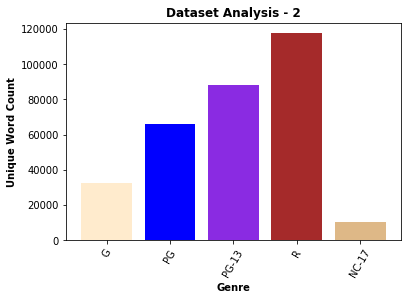

In [221]:
#Plot the unique word count for each rating
rating_categories = ["G", "PG", "PG-13", "R", "NC-17"]

G_movies_words_count = len(G_frequency)
PG_movies_words_count = len(PG_frequency)
PG_13_movies_words_count = len(PG_13_frequency)
R_movies_words_count = len(R_frequency)
NC_17_movies_words_count = len(NC_17_frequency)

colors = [name for name,hex in matplotlib.colors.cnames.items()]
bars_colors = colors[8:13]

plt.bar(np.arange(len(rating_categories)),[G_movies_words_count, PG_movies_words_count,PG_13_movies_words_count, R_movies_words_count, NC_17_movies_words_count], color= bars_colors)
plt.xlabel('Genre', fontsize=10, fontweight = "bold")
plt.ylabel('Unique Word Count', fontsize=10, fontweight = "bold")
plt.xticks(np.arange(len(rating_categories)),rating_categories, fontsize=10, rotation=60)
plt.title('Dataset Analysis - 2', fontweight = "bold")
                                           
plt.savefig("Dataset Analysis-2.png")

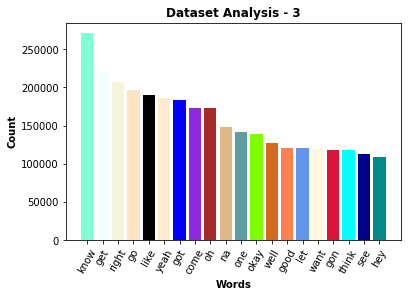

In [220]:
#Plot the histogram for the most frequent 20 words for the whole corpus
movies_words = []
for rating in rating_categories:
    rated_movies_table = movies_table.loc[movies_table["rating"] == rating]["movie_words"]
    for index in rated_movies_table.index:
        movies_words = movies_words + rated_movies_table[index]
        
movies_words = pd.Series(movies_words)
movies_words_frequency = movies_words.value_counts()
movies_words_top_20 = movies_words_frequency.head(20)

movies_words_top_20 = movies_words_top_20.to_dict()

movies_top_20_words = movies_words_top_20.keys()  
movies_top_20_frequecies = movies_words_top_20.values()

bars_colors = colors[3:23]

plt.bar(np.arange(len(movies_top_20_words)), movies_top_20_frequecies, color= bars_colors)
plt.xlabel('Words', fontsize=10, fontweight = "bold")
plt.ylabel('Count', fontsize=10, fontweight = "bold")
plt.xticks(np.arange(len(movies_top_20_words)),movies_top_20_words, fontsize=10, rotation=60)
plt.title('Dataset Analysis - 3', fontweight = "bold")

plt.savefig("Dataset Analysis-3.png")